Neste documento vamos analisar os dados da eleição municipal de são paulo, primeiro turno.
Os dados utilizado foram retirados do site https://www.tse.jus.br/hotsites/pesquisas-eleitorais/resultados_anos/2020.html

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
#esse arquivo é bem grande, meu computador leu com dificuldades. Não consegui abrir o arquivo pelo bloco de notas
data = pd.read_csv('C:/Users/juacysantos/Downloads/bweb_1t_SP_181120201549/bweb_1t_SP_181120201549.csv',
                   error_bad_lines=False,
                  encoding='latin1',
                  sep=';')

In [167]:
data

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,CD_CARGO_PERGUNTA,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DT_BU_RECEBIDO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,CD_TIPO_URNA,DS_TIPO_URNA,CD_TIPO_VOTAVEL,DS_TIPO_VOTAVEL,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_URNA_EFETIVADA,CD_CARGA_1_URNA_EFETIVADA,CD_CARGA_2_URNA_EFETIVADA,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
0,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,1,1,1015,11,Prefeito,-1,#NULO#,#NULO#,15/11/2020 22:26:42,386,241,145,1,APURADA,2,Branco,95,Branco,5,1618073,432.454.548.163.181.015.,306.728,E0BA7264,03/11/2020 11:19:00,11 - 1,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:46,0,15/11/2020 17:04:06,-1,-1
1,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,1,1,1015,11,Prefeito,13,PT,Partido dos Trabalhadores,15/11/2020 22:26:42,386,241,145,1,APURADA,1,Nominal,13,JILMAR TATTO,4,1618073,432.454.548.163.181.015.,306.728,E0BA7264,03/11/2020 11:19:00,11 - 1,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:46,0,15/11/2020 17:04:06,-1,-1
2,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,1,1,1015,11,Prefeito,18,REDE,Rede Sustentabilidade,15/11/2020 22:26:42,386,241,145,1,APURADA,1,Nominal,18,MARINA HELOU,1,1618073,432.454.548.163.181.015.,306.728,E0BA7264,03/11/2020 11:19:00,11 - 1,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:46,0,15/11/2020 17:04:06,-1,-1
3,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,1,1,1015,11,Prefeito,40,PSB,Partido Socialista Brasileiro,15/11/2020 22:26:42,386,241,145,1,APURADA,1,Nominal,40,MÁRCIO FRANÇA,29,1618073,432.454.548.163.181.015.,306.728,E0BA7264,03/11/2020 11:19:00,11 - 1,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:46,0,15/11/2020 17:04:06,-1,-1
4,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,1,1,1015,11,Prefeito,45,PSDB,Partido da Social Democracia Brasileira,15/11/2020 22:26:42,386,241,145,1,APURADA,1,Nominal,45,BRUNO COVAS,111,1618073,432.454.548.163.181.015.,306.728,E0BA7264,03/11/2020 11:19:00,11 - 1,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:46,0,15/11/2020 17:04:06,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355098,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,422,402,1392,11,Prefeito,10,REPUBLICANOS,REPUBLICANOS,15/11/2020 21:34:01,100,82,18,1,APURADA,1,Nominal,10,CELSO RUSSOMANNO,4,1302673,917.263.498.588.737.024.,128.502,2B1413C7,06/11/2020 15:59:00,11 - 402,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:20,0,15/11/2020 17:04:13,-1,-1
9355099,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,422,402,1392,11,Prefeito,51,PATRIOTA,Patriota,15/11/2020 21:34:01,100,82,18,1,APURADA,1,Nominal,51,ARTHUR DO VAL MAMÃE FALEI,13,1302673,917.263.498.588.737.024.,128.502,2B1413C7,06/11/2020 15:59:00,11 - 402,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:20,0,15/11/2020 17:04:13,-1,-1
9355100,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,422,402,1392,11,Prefeito,-1,#NULO#,#NULO#,15/11/2020 21:34:01,100,82,18,1,APURADA,3,Nulo,96,Nulo,4,1302673,917.263.498.588.737.024.,128.502,2B1413C7,06/11/2020 15:59:00,11 - 402,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:20,0,15/11/2020 17:04:13,-1,-1
9355101,18/11/2020,15:49:53,2020,0,Eleição Ordiná

In [168]:
#verificando a urna na secção em que fui mesário durante essas eleições
pd.set_option('display.max_columns', None)
data[(data['NR_ZONA']==404) & (data['NR_SECAO']==190)]

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,CD_CARGO_PERGUNTA,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DT_BU_RECEBIDO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,CD_TIPO_URNA,DS_TIPO_URNA,CD_TIPO_VOTAVEL,DS_TIPO_VOTAVEL,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_URNA_EFETIVADA,CD_CARGA_1_URNA_EFETIVADA,CD_CARGA_2_URNA_EFETIVADA,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
8601208,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,404,190,1228,11,Prefeito,45,PSDB,Partido da Social Democracia Brasileira,15/11/2020 20:38:00,361,267,94,1,APURADA,1,Nominal,45,BRUNO COVAS,49,1820168,179.897.894.966.797.127.,764.746,FCD7C9F8,06/11/2020 11:22:00,11 - 190,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:33,0,15/11/2020 17:04:09,-1,-1
8601209,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,404,190,1228,11,Prefeito,-1,#NULO#,#NULO#,15/11/2020 20:38:00,361,267,94,1,APURADA,2,Branco,95,Branco,23,1820168,179.897.894.966.797.127.,764.746,FCD7C9F8,06/11/2020 11:22:00,11 - 190,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:33,0,15/11/2020 17:04:09,-1,-1
8601210,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,404,190,1228,11,Prefeito,40,PSB,Partido Socialista Brasileiro,15/11/2020 20:38:00,361,267,94,1,APURADA,1,Nominal,40,MÁRCIO FRANÇA,34,1820168,179.897.894.966.797.127.,764.746,FCD7C9F8,06/11/2020 11:22:00,11 - 190,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:33,0,15/11/2020 17:04:09,-1,-1
8601211,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,404,190,1228,11,Prefeito,28,PRTB,Partido Renovador Trabalhista Brasileiro,15/11/2020 20:38:00,361,267,94,1,APURADA,1,Nominal,28,LEVY FIDELIX,2,1820168,179.897.894.966.797.127.,764.746,FCD7C9F8,06/11/2020 11:22:00,11 - 190,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:33,0,15/11/2020 17:04:09,-1,-1
8601212,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,404,190,1228,11,Prefeito,13,PT,Partido dos Trabalhadores,15/11/2020 20:38:00,361,267,94,1,APURADA,1,Nominal,13,JILMAR TATTO,43,1820168,179.897.894.966.797.127.,764.746,FCD7C9F8,06/11/2020 11:22:00,11 - 190,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:33,0,15/11/2020 17:04:09,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8601216,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,404,190,1228,11,Prefeito,55,PSD,Partido Social Democrático,15/11/2020 20:38:00,361,267,94,1,APURADA,1,Nominal,55,ANDREA MATARAZZO,5,1820168,179.897.894.966.797.127.,764.746,FCD7C9F8,06/11/2020 11:22:00,11 - 190,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:33,0,15/11/2020 17:04:09,-1,-1
8601217,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,404,190,1228,11,Prefeito,29,PCO,Partido da Causa Operária,15/11/2020 20:38:00,361,267,94,1,APURADA,1,Nominal,29,ANTÔNIO CARLOS,1,1820168,179.897.894.966.797.127.,764.746,FCD7C9F8,06/11/2020 11:22:00,11 - 190,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:33,0,15/11/2020 17:04:09,-1,-1
8601218,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,404,190,1228,11,Prefeito,10,REPUBLICANOS,REPUBLICANOS,15/11/2020 20:38:00,361,267,94,1,APURADA,1,Nominal,10,CELSO RUSSOMANNO,25,1820168,179.897.894.966.797.127.,764.746,FCD7C9F8,06/11/2020 11:22:00,11 - 190,#NULO#,15/11/

In [169]:
#filtrando as linhas apenas do municipio de são paulo e relacionado ao cargo de prefeito
data = data[(data['NM_MUNICIPIO']=='SÃO PAULO') & (data['DS_CARGO_PERGUNTA']=='Prefeito')]

In [182]:
data

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,CD_CARGO_PERGUNTA,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DT_BU_RECEBIDO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,CD_TIPO_URNA,DS_TIPO_URNA,CD_TIPO_VOTAVEL,DS_TIPO_VOTAVEL,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_URNA_EFETIVADA,CD_CARGA_1_URNA_EFETIVADA,CD_CARGA_2_URNA_EFETIVADA,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
0,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,1,1,1015,11,Prefeito,-1,#NULO#,#NULO#,15/11/2020 22:26:42,386,241,145,1,APURADA,2,Branco,95,Branco,5,1618073,432.454.548.163.181.015.,306.728,E0BA7264,03/11/2020 11:19:00,11 - 1,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:46,0,15/11/2020 17:04:06,-1,-1
1,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,1,1,1015,11,Prefeito,13,PT,Partido dos Trabalhadores,15/11/2020 22:26:42,386,241,145,1,APURADA,1,Nominal,13,JILMAR TATTO,4,1618073,432.454.548.163.181.015.,306.728,E0BA7264,03/11/2020 11:19:00,11 - 1,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:46,0,15/11/2020 17:04:06,-1,-1
2,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,1,1,1015,11,Prefeito,18,REDE,Rede Sustentabilidade,15/11/2020 22:26:42,386,241,145,1,APURADA,1,Nominal,18,MARINA HELOU,1,1618073,432.454.548.163.181.015.,306.728,E0BA7264,03/11/2020 11:19:00,11 - 1,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:46,0,15/11/2020 17:04:06,-1,-1
3,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,1,1,1015,11,Prefeito,40,PSB,Partido Socialista Brasileiro,15/11/2020 22:26:42,386,241,145,1,APURADA,1,Nominal,40,MÁRCIO FRANÇA,29,1618073,432.454.548.163.181.015.,306.728,E0BA7264,03/11/2020 11:19:00,11 - 1,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:46,0,15/11/2020 17:04:06,-1,-1
4,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,1,1,1015,11,Prefeito,45,PSDB,Partido da Social Democracia Brasileira,15/11/2020 22:26:42,386,241,145,1,APURADA,1,Nominal,45,BRUNO COVAS,111,1618073,432.454.548.163.181.015.,306.728,E0BA7264,03/11/2020 11:19:00,11 - 1,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:46,0,15/11/2020 17:04:06,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355098,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,422,402,1392,11,Prefeito,10,REPUBLICANOS,REPUBLICANOS,15/11/2020 21:34:01,100,82,18,1,APURADA,1,Nominal,10,CELSO RUSSOMANNO,4,1302673,917.263.498.588.737.024.,128.502,2B1413C7,06/11/2020 15:59:00,11 - 402,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:20,0,15/11/2020 17:04:13,-1,-1
9355099,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,422,402,1392,11,Prefeito,51,PATRIOTA,Patriota,15/11/2020 21:34:01,100,82,18,1,APURADA,1,Nominal,51,ARTHUR DO VAL MAMÃE FALEI,13,1302673,917.263.498.588.737.024.,128.502,2B1413C7,06/11/2020 15:59:00,11 - 402,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:20,0,15/11/2020 17:04:13,-1,-1
9355100,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,422,402,1392,11,Prefeito,-1,#NULO#,#NULO#,15/11/2020 21:34:01,100,82,18,1,APURADA,3,Nulo,96,Nulo,4,1302673,917.263.498.588.737.024.,128.502,2B1413C7,06/11/2020 15:59:00,11 - 402,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:20,0,15/11/2020 17:04:13,-1,-1
9355101,18/11/2020,15:49:53,2020,0,Eleição Ordiná

Pretendo fazer uma analise por zona/bairro para facilitar a compreensão irei utilizar os dados disponível em https://pt.wikipedia.org/wiki/Zonas_eleitorais_da_cidade_de_S%C3%A3o_Paulo
Para relacionar cada sessão com seu bairro

In [183]:
zonas = pd.read_csv('C:/Users/juacysantos/Documents/GitHub/training-data-exploration/zonas_eleitorais_sp.csv')

In [184]:
zonas

,zona,bairro
0,1,Bela Vista
1,2,Perdizes
2,3,Santa Ifigênia
3,4,Mooca
4,5,Jardim Paulista
...,...,...
53,417,Parque do Carmo
54,418,Pedreira
55,420,Vila Sabrina
56,421,Teotônio Vilela


In [185]:
#quantas zonas eleitorais temos?
len(pd.unique(data['NR_ZONA']))

58

In [186]:
#quantidade de sessões eleitorais por zona e quantidade de eleitores por zona?
data_agr = data[['NR_ZONA','NR_SECAO','QT_APTOS']]
data_agr = data_agr.drop_duplicates()
data_agr = data_agr.groupby(data_agr['NR_ZONA'])
data_agr = data_agr.agg({'NR_SECAO':'nunique', 'QT_APTOS':'sum'})
data_agr

,NR_SECAO,QT_APTOS
NR_ZONA,,
1,373,153402
2,437,180555
3,189,76816
4,392,160222
5,305,122253
...,...,...
417,300,122696
418,464,188570
420,308,119964


In [187]:
max_10 = data_agr.sort_values(by='QT_APTOS', ascending=False).head(10)
max_10 = max_10.merge(right=zonas, how='left', right_on='zona', left_on='NR_ZONA').loc[:,['zona', 'QT_APTOS', 'bairro']]
max_10

,zona,QT_APTOS,bairro
0,372,267693,Piraporinha
1,375,245813,São Mateus
2,374,239916,Rio Pequeno
3,376,239785,Brasilândia
4,381,226777,Parelheiros
5,253,217680,Tatuapé
6,352,203182,Itaim Paulista
7,371,192435,Grajaú
8,418,188570,Pedreira
9,389,187793,Perus


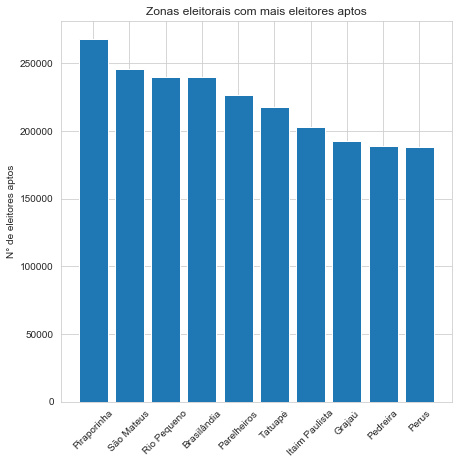

In [188]:
fig, ax = plt.subplots(figsize=(7,7))
plt.title('Zonas eleitorais com mais eleitores aptos')
plt.bar(x=max_10['bairro'], height=max_10['QT_APTOS'])
ax.set_ylabel('N° de eleitores aptos')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

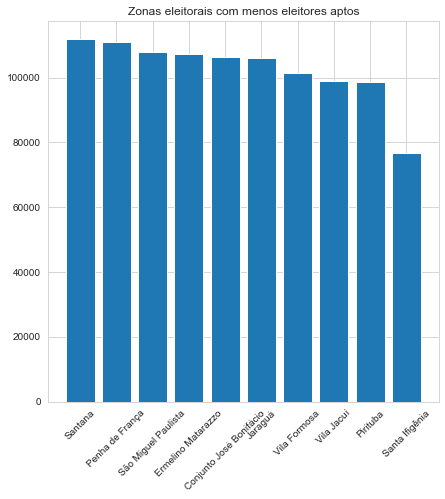

In [189]:
min_10 = data_agr.sort_values(by='QT_APTOS', ascending=False).tail(10)
min_10 = min_10.merge(right=zonas, how='left', right_on='zona', left_on='NR_ZONA').loc[:,['zona', 'QT_APTOS', 'bairro']]
min_10
fig, ax = plt.subplots(figsize=(7,7))
plt.title('Zonas eleitorais com menos eleitores aptos')
plt.bar(x=min_10['bairro'], height=min_10['QT_APTOS'])
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

In [190]:
#confirmando que a sessão 404 possui 459 sessões
len(pd.unique(data[data['NR_ZONA']==404]['NR_SECAO']))

459

Com esses dados das sessões por zona, conseguimos estimar quantos mesários participaram das eleições no municipio de são paulo. Como temos 4 mesários por sessão (Presidente, 1° e 2° mesários e secretário).

In [191]:
sum(data_agr['NR_SECAO'])*4

89596

Levando isso em conta, tivemos então 89596 mesários atuando no municipio de São Paulo. Aproximadamente 90 mil pessoas.

Contaremos agora a quantidade de votos por zona dos candidatos a prefeito e também a quantidade de votos brancos, nulos e abstenções. Assim conseguiremos analisar cada zona eleitoral.

In [192]:
pd.set_option('display.max_rows', None)
data_agr = data.groupby([data['NR_ZONA'], data['NM_VOTAVEL']])
data_agr = data_agr.agg({'QT_VOTOS':'sum'})
data_agr.sort_values(['NR_ZONA','QT_VOTOS'], ascending=False)


QT_VOTOS
NR_ZONA NM_VOTAVEL                         
422     BRUNO COVAS                   28271
        GUILHERME BOULOS              16578
        MÁRCIO FRANÇA                 13103
        Nulo                          11075
        ARTHUR DO VAL MAMÃE FALEI      9340
        CELSO RUSSOMANNO               9238
        Branco                         6456
        JILMAR TATTO                   5032
        JOICE HASSELMANN               2372
        ANDREA MATARAZZO               1536
        MARINA HELOU                    332
        LEVY FIDELIX                    215
        ORLANDO SILVA                   117
        VERA                             48
        ANTÔNIO CARLOS                   10
421     BRUNO COVAS                   24312
        GUILHERME BOULOS              15913
        Nulo                          12466
        JILMAR TATTO                  11541
        MÁRCIO FRANÇA                 11356
        CELSO RUSSOMANNO              10617
        Branco                         7526
        ARTHUR DO VAL MAMÃE FALEI      7183
        JOICE HASSELMANN               1637
        ANDREA MATARAZZO                948
        ORLANDO SILVA                   261
        LEVY FIDELIX                    224
        MARINA HELOU                    108
        VERA                             34
        ANTÔNIO CARLOS                   15
420     BRUNO COVAS                   24576
        GUILHERME BOULOS              11777
        MÁRCIO FRANÇA                 10738
        Nulo                           9674
        CELSO RUSSOMANNO               9114
        ARTHUR DO VAL MAMÃE FALEI      7103
        Branco                         5591
        JILMAR TATTO                   3130
        JOICE HASSELMANN               1418
        ANDREA MATARAZZO                920
        LEVY FIDELIX                    200
        MARINA HELOU                    180
        ORLANDO SILVA                   174
        VERA                             40
        ANTÔNIO CARLOS                   11
418     BRUNO COVAS                   35840
        GUILHERME BOULOS              19113
        Nulo                          15306
        JILMAR TATTO                  14853
        MÁRCIO FRANÇA                 13703
        CELSO RUSSOMANNO              12919
        ARTHUR DO VAL MAMÃE FALEI      9929
        Branco                         9367
        JOICE HASSELMANN               2007
        ANDREA MATARAZZO               1381
        MARINA HELOU                    249
        LEVY FIDELIX                    238
        ORLANDO SILVA                   213
        VERA                             69
        ANTÔNIO CARLOS                    9
417     BRUNO COVAS                   20512
        GUILHERME BOULOS              15446
        MÁRCIO FRANÇA                 11532
        Nulo                          10875
        CELSO RUSSOMANNO               8432
        ARTHUR DO VAL MAMÃE FALEI      7392
        JILMAR TATTO                   6075
        Branco                         5899
        JOICE HASSELMANN               1448
        ANDREA MATARAZZO                904
        MARINA HELOU                    169
        LEVY FIDELIX                    167
        ORLANDO SILVA                   148
        VERA                             64
        ANTÔNIO CARLOS                    6
413     BRUNO COVAS                   30731
        GUILHERME BOULOS              17210
        MÁRCIO FRANÇA                 13698
        Nulo                          10838
        ARTHUR DO VAL MAMÃE FALEI      9275
        CELSO RUSSOMANNO               8665
        JILMAR TATTO                   6395
        Branco                         5679
        JOICE HASSELMANN               1604
        ANDREA MATARAZZO               1138
        MARINA HELOU                    310
        LEVY FIDELIX                    211
        ORLANDO SILVA                   182
        VERA                             50
        ANTÔNIO CARLOS         

In [193]:
#usando o multi index para acessar votos por zona
data_agr.loc[(404,['Branco','Nulo']),:]

QT_VOTOS
NR_ZONA NM_VOTAVEL          
404     Branco          9905
        Nulo           15940

In [194]:
#os votos brancos e nulos não entram na contagem dos votos válidos, mas é interessante ver onde temos mais esse tipo de voto
for zona in zonas['zona'].unique():
    data_agr.loc[(zona,'Brancos + Nulos'),:]=sum(data_agr.loc[(zona,['Branco','Nulo']),:]['QT_VOTOS'])
pd.set_option('display.max_rows', None)
data_agr.sort_values(['NR_ZONA','QT_VOTOS'], ascending=False)

QT_VOTOS
NR_ZONA NM_VOTAVEL                         
422     BRUNO COVAS                 28271.0
        Brancos + Nulos             17531.0
        GUILHERME BOULOS            16578.0
        MÁRCIO FRANÇA               13103.0
        Nulo                        11075.0
        ARTHUR DO VAL MAMÃE FALEI    9340.0
        CELSO RUSSOMANNO             9238.0
        Branco                       6456.0
        JILMAR TATTO                 5032.0
        JOICE HASSELMANN             2372.0
        ANDREA MATARAZZO             1536.0
        MARINA HELOU                  332.0
        LEVY FIDELIX                  215.0
        ORLANDO SILVA                 117.0
        VERA                           48.0
        ANTÔNIO CARLOS                 10.0
421     BRUNO COVAS                 24312.0
        Brancos + Nulos             19992.0
        GUILHERME BOULOS            15913.0
        Nulo                        12466.0
        JILMAR TATTO                11541.0
        MÁRCIO FRANÇA               11356.0
        CELSO RUSSOMANNO            10617.0
        Branco                       7526.0
        ARTHUR DO VAL MAMÃE FALEI    7183.0
        JOICE HASSELMANN             1637.0
        ANDREA MATARAZZO              948.0
        ORLANDO SILVA                 261.0
        LEVY FIDELIX                  224.0
        MARINA HELOU                  108.0
        VERA                           34.0
        ANTÔNIO CARLOS                 15.0
420     BRUNO COVAS                 24576.0
        Brancos + Nulos             15265.0
        GUILHERME BOULOS            11777.0
        MÁRCIO FRANÇA               10738.0
        Nulo                         9674.0
        CELSO RUSSOMANNO             9114.0
        ARTHUR DO VAL MAMÃE FALEI    7103.0
        Branco                       5591.0
        JILMAR TATTO                 3130.0
        JOICE HASSELMANN             1418.0
        ANDREA MATARAZZO              920.0
        LEVY FIDELIX                  200.0
        MARINA HELOU                  180.0
        ORLANDO SILVA                 174.0
        VERA                           40.0
        ANTÔNIO CARLOS                 11.0
418     BRUNO COVAS                 35840.0
        Brancos + Nulos             24673.0
        GUILHERME BOULOS            19113.0
        Nulo                        15306.0
        JILMAR TATTO                14853.0
        MÁRCIO FRANÇA               13703.0
        CELSO RUSSOMANNO            12919.0
        ARTHUR DO VAL MAMÃE FALEI    9929.0
        Branco                       9367.0
        JOICE HASSELMANN             2007.0
        ANDREA MATARAZZO             1381.0
        MARINA HELOU                  249.0
        LEVY FIDELIX                  238.0
        ORLANDO SILVA                 213.0
        VERA                           69.0
        ANTÔNIO CARLOS                  9.0
417     BRUNO COVAS                 20512.0
        Brancos + Nulos             16774.0
        GUILHERME BOULOS            15446.0
        MÁRCIO FRANÇA               11532.0
        Nulo                        10875.0
        CELSO RUSSOMANNO             8432.0
        ARTHUR DO VAL MAMÃE FALEI    7392.0
        JILMAR TATTO                 6075.0
        Branco                       5899.0
        JOICE HASSELMANN             1448.0
        ANDREA MATARAZZO              904.0
        MARINA HELOU                  169.0
        LEVY FIDELIX                  167.0
        ORLANDO SILVA                 148.0
        VERA                           64.0
        ANTÔNIO CARLOS                  6.0
413     BRUNO COVAS                 30731.0
        GUILHERME BOULOS            17210.0
        Brancos + Nulos             16517.0
        MÁRCIO FRANÇA               13698.0
        Nulo                        10838.0
        ARTHUR DO VAL MAMÃE FALEI    9275.0
        CELSO RUSSOMANNO             8665.0
        JILMAR TATTO                 6395.0
        Branco                       5679.0
        JOICE HASSELMANN       

In [195]:
pd.set_option('display.max_rows', 10)
abstencoes = data[['NR_ZONA', 'NR_SECAO', 'QT_APTOS', 'QT_COMPARECIMENTO', 'QT_ABSTENCOES']]
abstencoes = abstencoes.drop_duplicates()
abstencoes

,NR_ZONA,NR_SECAO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES
0,1,1,386,241,145
135,1,2,450,288,162
270,1,3,452,281,171
419,1,4,449,269,180
560,1,5,450,293,157
...,...,...,...,...,...
9354719,422,396,400,302,98
9354839,422,397,378,253,125
9354951,422,400,228,184,44
9355029,422,401,133,111,22


In [196]:
abstencoes = abstencoes.groupby('NR_ZONA').agg({'QT_ABSTENCOES':'sum', 'QT_APTOS':'sum'})
abstencoes

,QT_ABSTENCOES,QT_APTOS
NR_ZONA,,
1,59518,153402
2,61557,180555
3,29158,76816
4,53079,160222
5,46976,122253
...,...,...
417,33627,122696
418,53374,188570
420,35318,119964


In [197]:
#calculando o percentual de votos por sessão eleitoral de cada candidato com relação ao total de votos válidos
for zona in zonas['zona'].unique():
    candidatos_zona = data_agr.loc[zona].index
    for candidato in candidatos_zona:
        data_agr.loc[(zona,candidato),'percentual'] = round((data_agr.loc[(zona,candidato),:]['QT_VOTOS']/abstencoes.loc[zona]['QT_APTOS'])*100,2)
        
data_agr.sort_values(['NR_ZONA','QT_VOTOS'], ascending=False)

QT_VOTOS  percentual
NR_ZONA NM_VOTAVEL                            
422     BRUNO COVAS        28271.0       19.56
        Brancos + Nulos    17531.0       12.13
        GUILHERME BOULOS   16578.0       11.47
        MÁRCIO FRANÇA      13103.0        9.07
        Nulo               11075.0        7.66
...                            ...         ...
1       MARINA HELOU         507.0        0.33
        ORLANDO SILVA        205.0        0.13
        LEVY FIDELIX         154.0        0.10
        VERA                  69.0        0.04
        ANTÔNIO CARLOS        17.0        0.01

[928 rows x 2 columns]

In [198]:
for zona in zonas['zona'].unique():
    candidatos_ord = data_agr.loc[zona].sort_values('percentual', ascending=False).index
    for i in range(len(candidatos_ord)):
        data_agr.loc[(zona,candidatos_ord[i]),'posicao'] = (i+1)
    

In [199]:
data_agr.sort_values(['NR_ZONA','percentual'], ascending = False)

QT_VOTOS  percentual  posicao
NR_ZONA NM_VOTAVEL                                     
422     BRUNO COVAS        28271.0       19.56      1.0
        Brancos + Nulos    17531.0       12.13      2.0
        GUILHERME BOULOS   16578.0       11.47      3.0
        MÁRCIO FRANÇA      13103.0        9.07      4.0
        Nulo               11075.0        7.66      5.0
...                            ...         ...      ...
1       MARINA HELOU         507.0        0.33     12.0
        ORLANDO SILVA        205.0        0.13     13.0
        LEVY FIDELIX         154.0        0.10     14.0
        VERA                  69.0        0.04     15.0
        ANTÔNIO CARLOS        17.0        0.01     16.0

[928 rows x 3 columns]

In [200]:
data_agr.reset_index(inplace=True)

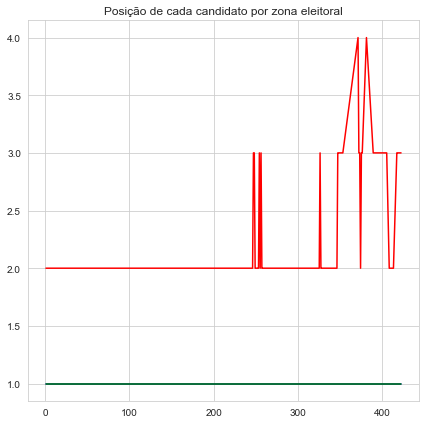

In [201]:
fig, ax = plt.subplots(figsize=(7,7))
plt.title('Posição de cada candidato por zona eleitoral')

plt.plot(data_agr[data_agr['NM_VOTAVEL']=='BRUNO COVAS']['NR_ZONA'], data_agr[data_agr['NM_VOTAVEL']=='BRUNO COVAS']['posicao'], color='b')
plt.plot(data_agr[data_agr['NM_VOTAVEL']=='GUILHERME BOULOS']['NR_ZONA'], data_agr[data_agr['NM_VOTAVEL']=='GUILHERME BOULOS']['posicao'], color='r')
plt.plot(data_agr[data_agr['NM_VOTAVEL']=='Brancos + Nulos']['NR_ZONA'], data_agr[data_agr['NM_VOTAVEL']=='BRUNO COVAS']['posicao'], color='g')


In [202]:
data_agr[data_agr['NM_VOTAVEL']=='BRUNO COVAS']

,NR_ZONA,NM_VOTAVEL,QT_VOTOS,percentual,posicao
3,1,BRUNO COVAS,28395.0,18.51,1.0
18,2,BRUNO COVAS,40083.0,22.20,1.0
33,3,BRUNO COVAS,13008.0,16.93,1.0
48,4,BRUNO COVAS,34482.0,21.52,1.0
63,5,BRUNO COVAS,31379.0,25.67,1.0
...,...,...,...,...,...
798,417,BRUNO COVAS,20512.0,16.72,1.0
813,418,BRUNO COVAS,35840.0,19.01,1.0
828,420,BRUNO COVAS,24576.0,20.49,1.0
843,421,BRUNO COVAS,24312.0,17.16,1.0


In [203]:
#calculando o percentual de abstenções por sessão eleitoral
abstencoes['percentual'] = abstencoes.apply(lambda x:round((x['QT_ABSTENCOES']/x['QT_APTOS'])*100,2), axis=1)
abstencoes

,QT_ABSTENCOES,QT_APTOS,percentual
NR_ZONA,,,
1,59518,153402,38.80
2,61557,180555,34.09
3,29158,76816,37.96
4,53079,160222,33.13
5,46976,122253,38.43
...,...,...,...
417,33627,122696,27.41
418,53374,188570,28.30
420,35318,119964,29.44


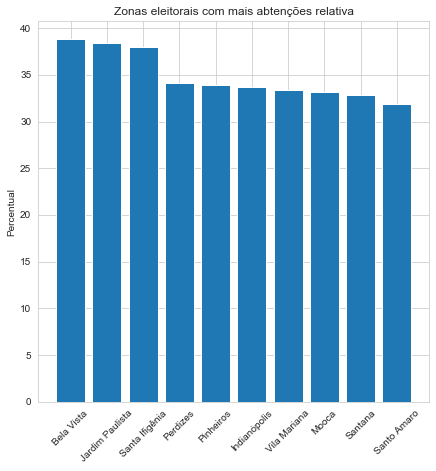

In [204]:
max_10 = abstencoes.sort_values(by='percentual', ascending=False).head(10)
max_10 = max_10.merge(right=zonas, how='left', right_on='zona', left_on='NR_ZONA').loc[:,['zona', 'percentual', 'bairro', 'QT_ABSTENCOES']]
max_10
fig, ax = plt.subplots(figsize=(7,7))
plt.title('Zonas eleitorais com mais abstenção')
plt.bar(x=max_10['bairro'], height=max_10['percentual'])
ax.set_ylabel('Percentual')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

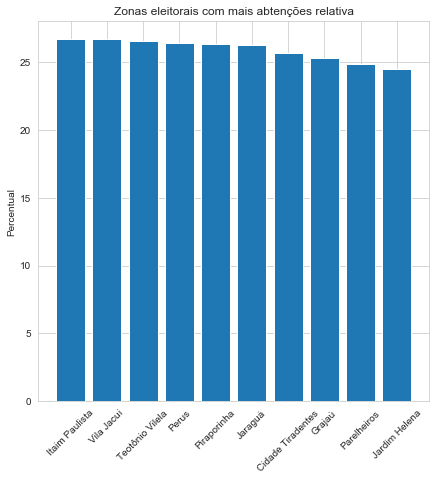

In [205]:
min_10 = abstencoes.sort_values(by='percentual', ascending=False).tail(10)
min_10 = min_10.merge(right=zonas, how='left', right_on='zona', left_on='NR_ZONA').loc[:,['zona', 'percentual', 'bairro', 'QT_ABSTENCOES']]
max_10
fig, ax = plt.subplots(figsize=(7,7))
plt.title('Zonas eleitorais com menos abstenção')
plt.bar(x=min_10['bairro'], height=min_10['percentual'])
ax.set_ylabel('Percentual')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

In [207]:
data_agr = data_agr.merge(right=zonas, how='left', right_on='zona', left_on='NR_ZONA')

In [208]:
data_agr['bairro']=data_agr['bairro'].apply(lambda x:re.sub('Paulista', 'Pta', x))
data_agr['bairro']=data_agr['bairro'].apply(lambda x:re.sub('Senhora', 'Sra', x))
data_agr['bairro']=data_agr['bairro'].apply(lambda x:re.sub('Jardim', 'Jd', x))
data_agr['bairro']=data_agr['bairro'].apply(lambda x:re.sub('Cidade', 'Cid', x))
data_agr['bairro']=data_agr['bairro'].apply(lambda x:re.sub('Conjunto', 'Conj', x))
data_agr['bairro']=data_agr['bairro'].apply(lambda x:re.sub('Ermelino', 'Erm', x))
data_agr['bairro']=data_agr['bairro'].apply(lambda x:re.sub('Ermelino', 'Erm', x))
data_agr['bairro']=data_agr['bairro'].apply(lambda x:re.sub('José', 'J', x))

In [209]:
data_agr[data_agr['NM_VOTAVEL']=='Brancos + Nulos'].sort_values(by='percentual', ascending=False)

,NR_ZONA,NM_VOTAVEL,QT_VOTOS,percentual,posicao,zona,bairro
916,397,Brancos + Nulos,23290.0,15.34,2.0,397,Jd Helena
905,353,Brancos + Nulos,26405.0,14.94,2.0,353,Guaianases
904,352,Brancos + Nulos,30294.0,14.91,2.0,352,Itaim Pta
912,381,Brancos + Nulos,33285.0,14.68,2.0,381,Parelheiros
917,398,Brancos + Nulos,14342.0,14.48,2.0,398,Vila Jacuí
...,...,...,...,...,...,...,...
875,6,Brancos + Nulos,9106.0,5.71,5.0,6,Vila Mariana
889,258,Brancos + Nulos,10026.0,5.41,5.0,258,Indianópolis
871,2,Brancos + Nulos,9201.0,5.10,5.0,2,Perdizes
874,5,Brancos + Nulos,4786.0,3.91,5.0,5,Jd Pta


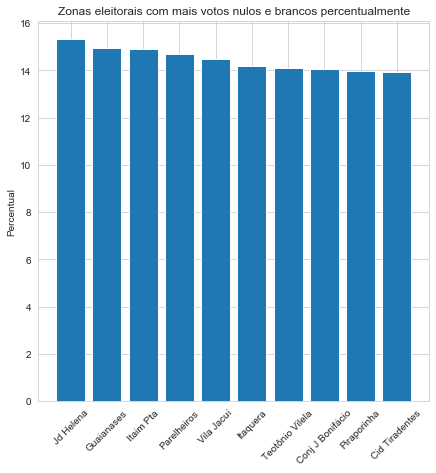

In [210]:
max_10 = data_agr[data_agr['NM_VOTAVEL']=='Brancos + Nulos'].sort_values(by='percentual', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(7,7))
plt.title('Zonas eleitorais com mais votos nulos e brancos percentualmente')
plt.bar(x=max_10['bairro'], height=max_10['percentual'])
ax.set_ylabel('Percentual')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

Podemos verificar que muitos bairros da zona leste estão entre os com maiores numeros de votos nulos e brancos.

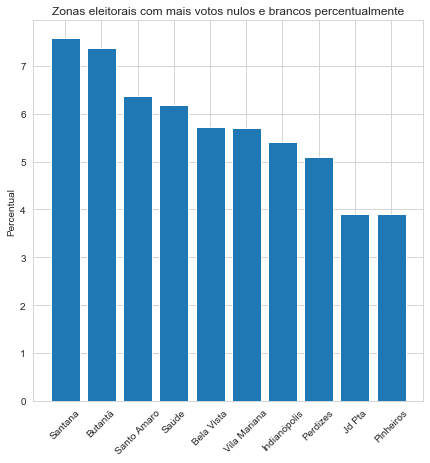

In [211]:
min_10 = data_agr[data_agr['NM_VOTAVEL']=='Brancos + Nulos'].sort_values(by='percentual', ascending=False).tail(10)
fig, ax = plt.subplots(figsize=(7,7))
plt.title('Zonas eleitorais com mais votos nulos e brancos percentualmente')
plt.bar(x=min_10['bairro'], height=min_10['percentual'])
ax.set_ylabel('Percentual')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

In [212]:
#para o eixo x ficar em ordem alfabetica
data_agr = data_agr.sort_values('bairro')

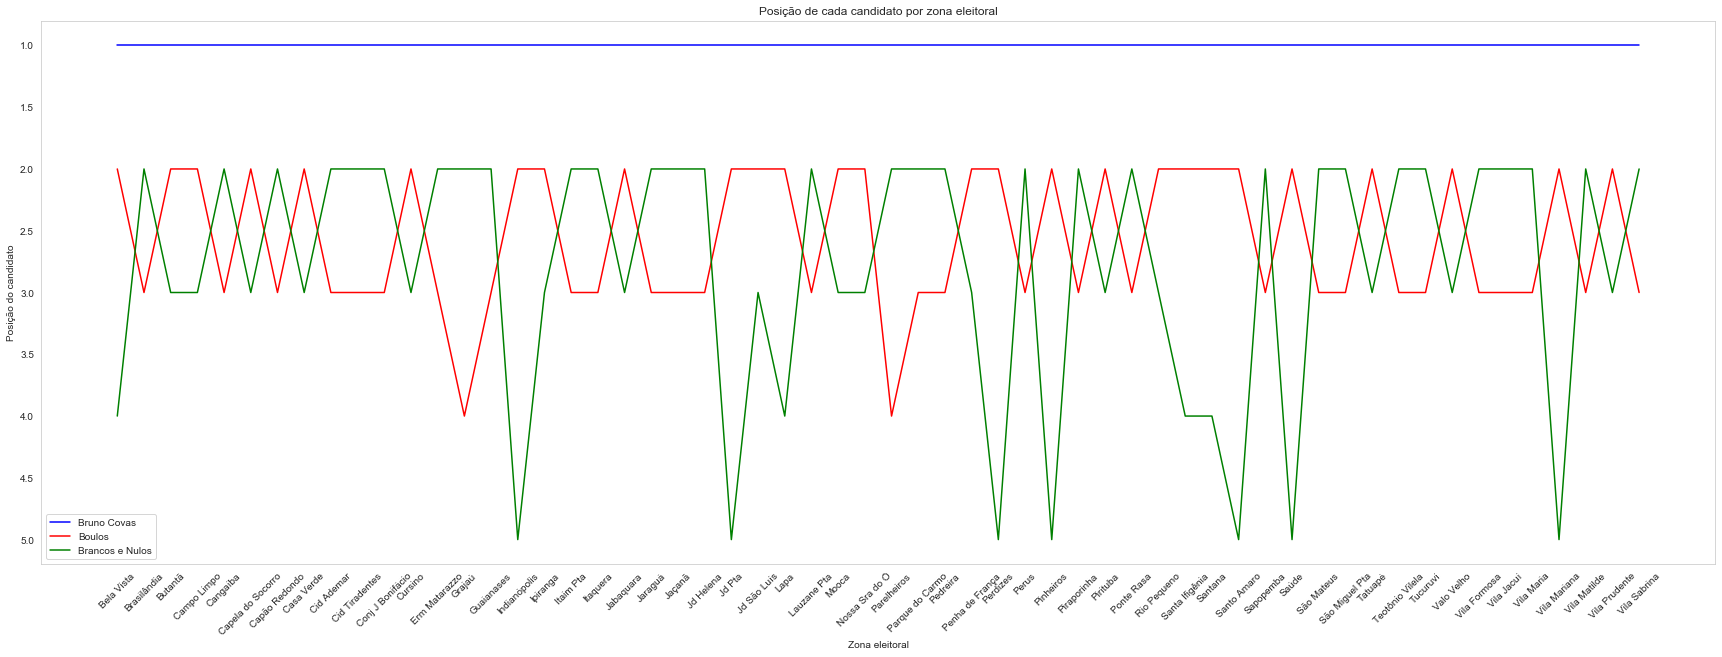

In [213]:
fig, ax = plt.subplots(figsize=(30,10))
plt.title('Posição de cada candidato por zona eleitoral')

plt.plot(data_agr[data_agr['NM_VOTAVEL']=='BRUNO COVAS']['bairro'], data_agr[data_agr['NM_VOTAVEL']=='BRUNO COVAS']['posicao'], color='b', label='Bruno Covas')
plt.plot(data_agr[data_agr['NM_VOTAVEL']=='GUILHERME BOULOS']['bairro'], data_agr[data_agr['NM_VOTAVEL']=='GUILHERME BOULOS']['posicao'], color='r', label='Boulos')
plt.plot(data_agr[data_agr['NM_VOTAVEL']=='Brancos + Nulos']['bairro'], data_agr[data_agr['NM_VOTAVEL']=='Brancos + Nulos']['posicao'], color='g', label='Brancos e Nulos')
#plt.plot(data_agr[data_agr['NM_VOTAVEL']=='MÁRCIO FRANÇA']['bairro'], data_agr[data_agr['NM_VOTAVEL']=='MÁRCIO FRANÇA']['posicao'], color='orange', label='MÁRCIO FRANÇA')
#plt.plot(data_agr[data_agr['NM_VOTAVEL']=='ARTHUR DO VAL MAMÃE FALEI']['bairro'], data_agr[data_agr['NM_VOTAVEL']=='ARTHUR DO VAL MAMÃE FALEI']['posicao'], color='deeppink', label='Arthur do Val')
ax.invert_yaxis()
ax.legend()
ax.set_xlabel('Zona eleitoral')
ax.set_ylabel('Posição do candidato')
ax.grid()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.savefig(r'C:\Users\juacysantos\Documents\python\graficos eleicao\bruno_boulos_nulos.png')

In [214]:
data_agr[data_agr['NM_VOTAVEL']=='Brancos + Nulos']['bairro']

870       Bela Vista
911      Brasilândia
898          Butantã
897      Campo Limpo
914         Cangaíba
           ...      
885       Vila Maria
875     Vila Mariana
899     Vila Matilde
888    Vila Prudente
925     Vila Sabrina
Name: bairro, Length: 58, dtype: object

In [215]:
data_agr['posicao'] = data_agr['posicao'].apply(int)
data_agr['posicao'] = data_agr['posicao'].apply(str)

In [216]:
data_agr

,NR_ZONA,NM_VOTAVEL,QT_VOTOS,percentual,posicao,zona,bairro
0,1,ANDREA MATARAZZO,1688.0,1.10,10,1,Bela Vista
13,1,ORLANDO SILVA,205.0,0.13,13,1,Bela Vista
12,1,Nulo,5522.0,3.60,7,1,Bela Vista
11,1,MÁRCIO FRANÇA,10223.0,6.66,3,1,Bela Vista
10,1,MARINA HELOU,507.0,0.33,12,1,Bela Vista
...,...,...,...,...,...,...,...
832,420,JILMAR TATTO,3130.0,2.61,9,420,Vila Sabrina
833,420,JOICE HASSELMANN,1418.0,1.18,10,420,Vila Sabrina
834,420,LEVY FIDELIX,200.0,0.17,12,420,Vila Sabrina
835,420,MARINA HELOU,180.0,0.15,13,420,Vila Sabrina


In [217]:
#quantidade total de votos por candidato
total_votos = data_agr.groupby('NM_VOTAVEL')[['QT_VOTOS']].sum().sort_values('QT_VOTOS',ascending=False)
total_votos.index

Index(['BRUNO COVAS', 'GUILHERME BOULOS', 'Brancos + Nulos', 'MÁRCIO FRANÇA',
       'Nulo', 'CELSO RUSSOMANNO', 'ARTHUR DO VAL MAMÃE FALEI', 'JILMAR TATTO',
       'Branco', 'JOICE HASSELMANN', 'ANDREA MATARAZZO', 'MARINA HELOU',
       'ORLANDO SILVA', 'LEVY FIDELIX', 'VERA', 'ANTÔNIO CARLOS'],
      dtype='object', name='NM_VOTAVEL')

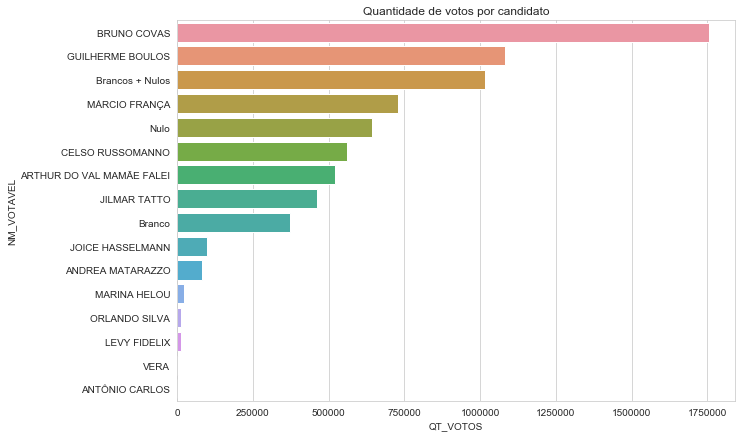

In [218]:
fig, ax = plt.subplots(figsize=(10,7))
plt.title('Quantidade de votos por candidato')
sns.barplot(y=total_votos.index, x=total_votos['QT_VOTOS'])

In [219]:
x="um dia muito doido"
x = re.sub('dia', 'noite', x)
print(x)

um noite muito doido
